In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
  # mount google drive
  from google.colab import drive
  drive.mount('/content/drive')
  # find automatically the path of the folder containing "file_name" :
  # file_name = 'hmm_viterbi.ipynb'
  # import subprocess
  # file_path = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
  # file_path = file_path.replace(file_name,"").replace('\n',"")
  file_path = "./drive/MyDrive/CS5340/project/hmm"
  print(file_path)
  os.chdir(file_path)
  # change current path to the folder containing "file_name"
  !pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
./drive/MyDrive/CS5340/project/hmm
/content/drive/MyDrive/CS5340/project/hmm


In [2]:
import evaluation as eva
import hmm_add_k_smooth as hmm
import datetime

Train finished...
Training time: 0:00:04.632436
Test finished...
Test time: 0:02:08.859220
Accuracy=94.549997%


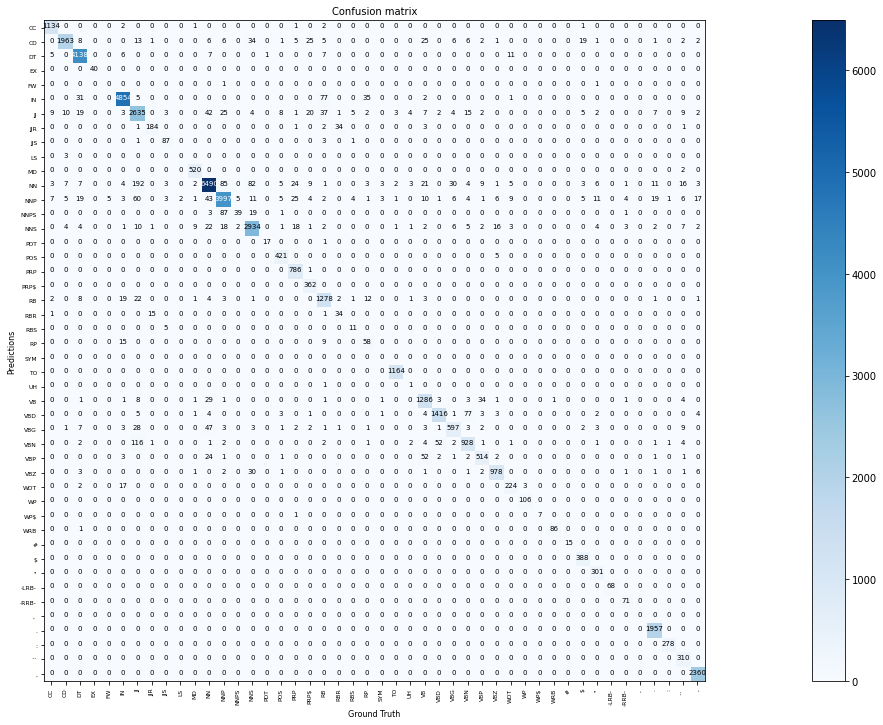

In [3]:
Curr_Path = os.getcwd()
Data_Path = os.path.join(os.path.abspath(os.path.dirname(Curr_Path)), "data")
Train_File = os.path.join(Data_Path, "sents.train")
Test_File = os.path.join(Data_Path, "sents.test")
Output_File = os.path.join(Data_Path, "sents.output_hmm")

Pos_Info = hmm.init()

Start_Time = datetime.datetime.now()
hmm.train_model(Train_File, Pos_Info)
End_Time = datetime.datetime.now()
print('Training time:', End_Time - Start_Time)

Start_Time = datetime.datetime.now()
hmm.test_model(Test_File, Pos_Info, Output_File)
End_Time = datetime.datetime.now()
print('Test time:', End_Time - Start_Time)

Ref_File = os.path.join(Data_Path, "sents.answer")
eva.evaluation(Output_File, Ref_File, Pos_Info.tag_map)